<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/Sampling_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Theorem

## Problem 2.6 (as of 2020)

Let $F(i2\pi f) = \begin{cases} 1 - |f|/f_0 & |f| < f_0\\ 0 & \text{otherwise}\end{cases}$

Sketch the spectrum $F_s(e^{i \Omega})$ of the sampled signal $f_s [k] = T f(kT)$ for 

1.   $T = 1/(2f_0) \ \iff f_s = 2 f_0$
2.   $T = 1/(\frac{3}{2}f_0) \iff f_s = \frac{3}{2} f_0$
3.   $T = 1/(f_0) \ \ \ \iff f_s = f_0$

$Y_s(z) = \sum\limits_{s\in\mathbb{C} : e^{sT} = z} Y(s) \qquad$ (2.48 in lecture notes)




In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
f_0G = 10
f_sG = 1.5
def update_parameters(f_0, f_s):
  global f_0G, f_sG
  f_0G, f_sG = f_0, f_s * f_0 #multiples of f_0
widgets.interact(update_parameters, f_0 = widgets.IntSlider(min=1, max=20, value=10), f_s = widgets.FloatSlider(min=1, max=2.5, value=1.5))

#Important Stuff
################################################################################
#example spectrum, unless specified f_0 is at 10 Hz
def F(f, f_0):
  if abs(f) > f_0:
    return 0
  else:
    return 1 - np.abs(f)/f_0

def F_s(Omega, f_s, f_0):
  f = Omega*f_s/(2*np.pi)
  s = 0
  #F_s(Omega) = sum_{n\in Z} F(i*(Omega+n*2pi))
  for n in range(-20, 20):#only some of the frequency spectrum will be summed over for computational reasons
    s += F(f+n*f_s, f_0)
  return s

#example signal in time domain
def f(t, f_0):
  return f_0*np.sinc(f_0*t)**2 #IFT of F

#reconstructed signal (with potential aliasing) in time domain
def f_r(t, f_0, f_s):
  s = 0
  for k in range(-20, 20):#only some of the samples will be summed over for computational reasons
    s += f(k/f_s, f_0)*np.sinc(t*f_s-k)
  return s
################################################################################

#range to display
f_values = np.linspace(-2*f_0G,2*f_0G,100)
Omega_values = np.linspace(-3*np.pi, 3*np.pi, 100)
t_values = np.linspace(-0.7, 0.7, 150)**3

#drawing plots
def plot():
  y_values = [F(f, f_0G) for f in f_values]
  y2_values = [F_s(Omega, f_sG, f_0G) for Omega in Omega_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$f$', fontsize=14)
  ax1.set_ylabel('$F(2\pi\ i\ f)$', fontsize=14)
  ax1.axis(xmin=f_values[0], xmax=f_values[-1], ymin=0, ymax=1.5)
  ax1.plot(f_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$\Omega$', fontsize=14)
  ax2.set_ylabel('$F_s(e^{i\Omega})$', fontsize=14)
  ax2.axis(xmin=Omega_values[0], xmax=Omega_values[-1], ymin=0, ymax=1.5)
  ax2.plot(Omega_values, y2_values, alpha=0.5, marker='o', markersize=8);

def plot_time():
  y_values = [f(t, f_0G) for t in t_values]
  y2_values = [f_r(t, f_0G, f_sG) for t in t_values]

  fig = plt.figure(figsize=(20, 8))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.grid()
  ax1.set_xlabel('$t$', fontsize=14)
  ax1.set_ylabel('$f(t)$', fontsize=14)
  ax1.axis(xmin=t_values[0], xmax=t_values[-1])
  ax1.plot(t_values, y_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.grid()
  ax2.set_xlabel('$t$', fontsize=14)
  ax2.set_ylabel('$f_s(t)$', fontsize=14)
  ax2.axis(xmin=t_values[0], xmax=t_values[-1])
  ax2.plot(t_values, y2_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(IntSlider(value=10, description='f_0', max=20, min=1), FloatSlider(value=1.5, descriptio…

$f_0$ can be set in Hertz while $f_s$ is a multiple of $f_0$ (also set with slider).

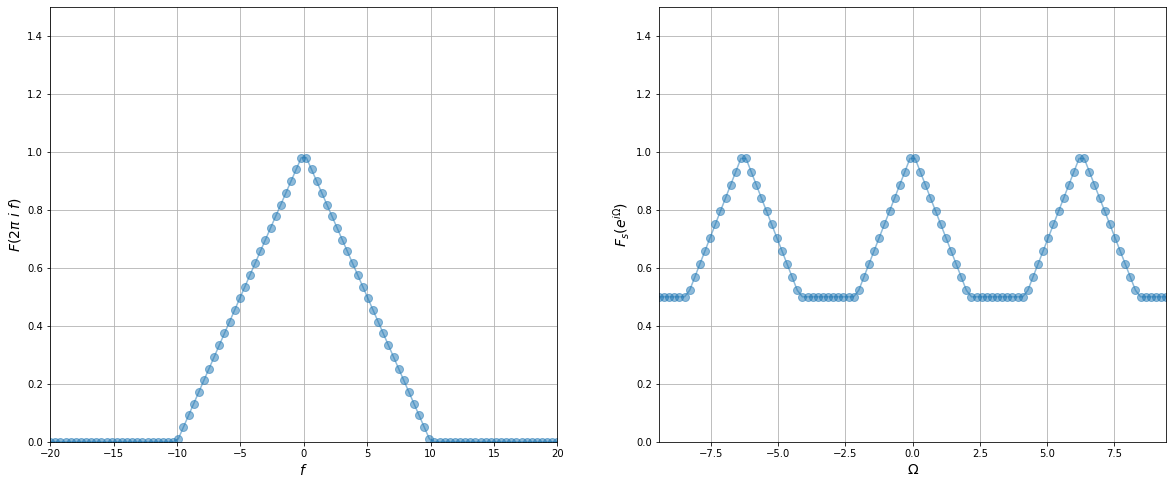

In [2]:
plot()

Having seen the effect on the spectrum you may wonder how the time domain changes if aliasing occurs. You might only see subtle changes in this waveform (try the extreme $f_s = 1\cdot f_0$).

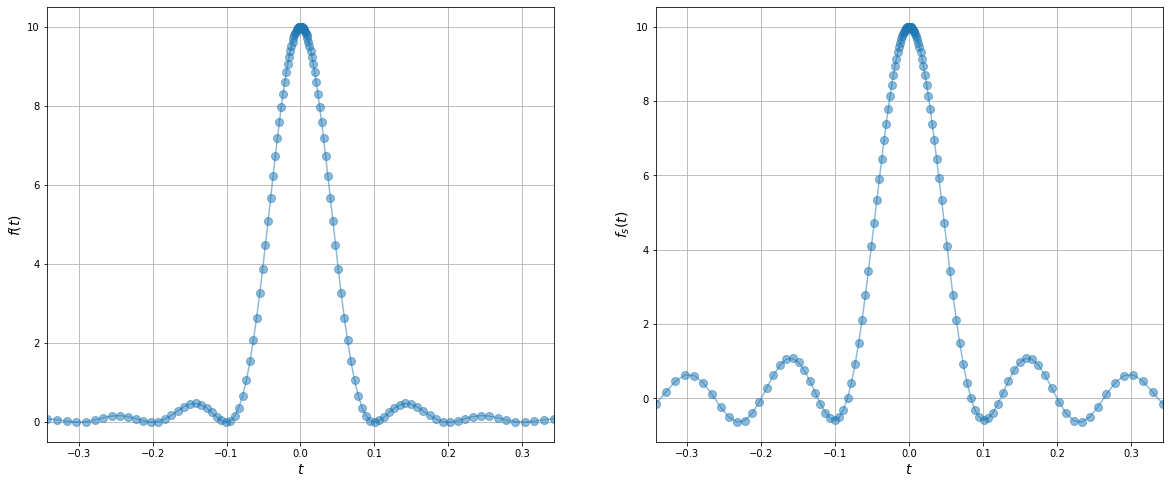

In [3]:
plot_time()